<a href="https://colab.research.google.com/github/abhi247ai/tensorflow_sessions/blob/main/Reinforcement_Openai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [6]:
Q = np.zeros((STATES, ACTIONS))      #creates a matrix with zero values
Q.shape, Q

((16, 4), array([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]))

**CONSTANTS**

declaring for our agents when to stop training while updating Q-table

In [ ]:
EPISODES = 10000    #how many times to start envi from beginning
MAX_STEPS = 100     #max steps allwed each run of env

LEARNING_RATE = 0.81    
GAMMA = 0.96   

**RANDOM PICK OF ACTION**

In [ ]:
epsilon = 0.9

if np.random.uniform(0,1) < epsilon:
  action = env.action_space.sample()
else:
  action = np.argmax(Q[state, :])

In [10]:
Q[state,action] = Q[state,action] + LEARNING_RATE*(reward + GAMMA*np.max(Q[next_state, :]) - Q[state,action])

In [11]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v0')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))  

EPISODES = 1500    #how many times to start envi from beginning
MAX_STEPS = 100     #max steps allwed each run of env

LEARNING_RATE = 0.81    
GAMMA = 0.96   

RENDER = False   #True if want to see training

epsilon = 0.9

In [12]:
rewards = []
for episodes in range(EPISODES):

  state = env.reset()
  for _ in range(MAX_STEPS):

    if RENDER:
      env.render()
    
    if np.random.uniform(0,1) < epsilon:
      action = env.action_space.sample()
    else:
      action = np.argmax(Q[state, :])

    next_state, reward, done, _ = env.step(action)

    Q[state,action] = Q[state,action] + LEARNING_RATE*(reward + GAMMA*np.max(Q[next_state, :]) - Q[state,action])

    state = next_state

    if done:
      rewards.append(reward)
      epsilon -= 0.001
      break  #goal achieved

print(Q)
print(f'Average reward: {sum(rewards)/len(rewards)}:')

[[2.84739134e-01 3.54503442e-02 3.28061753e-02 3.56683189e-02]
 [7.11408100e-03 1.55905327e-02 7.31351664e-04 1.83574358e-01]
 [1.21995754e-02 1.37469119e-02 2.29227074e-02 3.67104643e-01]
 [1.48311355e-02 7.17505274e-03 1.23956162e-02 1.63334934e-01]
 [3.48496272e-01 1.60728326e-02 1.00435026e-02 7.93609748e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.19097531e-05 1.04992876e-04 2.03258829e-01 7.82987987e-08]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.28720860e-02 1.47367538e-02 1.28310552e-02 3.69073903e-01]
 [1.60281505e-02 7.02570078e-01 9.87235622e-03 5.31682893e-03]
 [8.89644925e-01 3.16851130e-03 1.77777072e-03 3.25803260e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.66291578e-02 2.55349556e-02 6.91147144e-01 2.25892012e-02]
 [6.15022358e-02 9.89823002e-01 1.55964428e-01 1.72662580e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

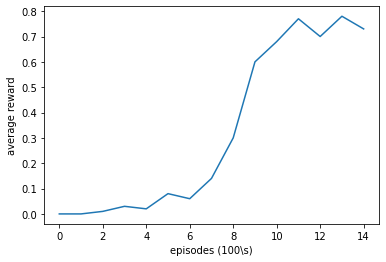

In [14]:
import matplotlib.pyplot as plt


def get_average(values):
  return sum(values)/len(values)

avg_rewards = []

for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100]))

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\s)')
plt.show()